In [2]:
# Import libraries

import plotly.graph_objs as go
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
from glob import glob
from ipywidgets import Video, Layout, VBox, HBox, HTML, widgets, interactive

task2idx_dict = {
    "vself": 0,
    "vmin": 1,
    "vmax": 2,
    "headneck": 3,
    "dtspeech": 4,
    "dtmath": 5,
    "dtcarry": 6,
    "ec": 7
}

pheno2idx_dict = {
    "aengstliches Gangbild": 0,
    "antalgisches Gangbild": 1,
    "ataktisches Gangbild": 2,
    "dyskinetisches Gangbild": 3,
    "funktionelles Gangbild": 4,
    "gesundes Gangbild": 5,
    "hypokinetisch-frontales Gangbild": 6,
    "hypokinetisches Gangbild": 7,
    "motorisch-kognitives Gangbild": 8,
    "paretisches Gangbild": 9,
    "sensorisch-ataktisches Gangbild": 10,
    "spastisch-ataktisches Gangbild": 11,
    "spastisches Gangbild": 12
}

pheno2idx_dict = {k.replace(" ", "\n"): v for k, v in pheno2idx_dict.items()}

direction2idx_dict = {
    "Unknown":0,
    "Towards":1,
    "Away":2
}

idx2direction_dict = {v: k for k, v in direction2idx_dict.items()}

idx2pheno_dict = {v: k for k, v in pheno2idx_dict.items()}

idx2task_dict = {v: k for k, v in task2idx_dict.items()}

def idx2task(idx):
    return idx2task_dict[idx]

def idx2pheno(idx):
    return idx2pheno_dict[idx]

def idx2direction(idx):
    return idx2direction_dict[idx]

def tick_val_text_tasks():
    vals = list(idx2task_dict.keys())
    texts = [idx2task(i) for i in vals]
    return (vals, texts)

def tick_val_text_phenos():
    vals = list(idx2pheno_dict.keys())
    texts = [idx2pheno(i) for i in vals]
    return (vals, texts)

def tick_val_text_directions():
    vals = list(idx2direction_dict.keys())
    texts = [idx2direction(i) for i in vals]
    return (vals, texts)

def write_df_pickle(df, write_path):
    with open(write_path, "wb") as fh:
        pickle.dump(df, fh)
        
def load_df_pickle(df_path):
    with open(df_path, "rb") as fh:
        try:
            loaded_df = pickle.load(fh, encoding='latin1')
            # loaded_df = pickle.load(fh, encoding='utf-8')
        except TypeError:
            loaded_df = pickle.load(fh)
    return loaded_df


In [3]:
# initialize values
data_dir = "data/"

# Cond-Direct-Ident
videos_data_dir = os.path.join(data_dir, "videos/Ident_complete_Cond_Direct/")
videos_name_common = "Ident_complete_Cond_Direct_{}.mp4"
df_name = "model_outputs_full_final.pickle"

display_columns = ["task_text", "pheno_text", "direction_text"]

# Load data
df = load_df_pickle(os.path.join(data_dir, df_name))
df["task_text"] = df.task.apply(idx2task)
df["pheno_text"] = df.pheno.apply(idx2pheno)
df["direction_text"] = df.direction.apply(idx2direction)

# Arrange data
num_vids = len(glob(os.path.join(videos_data_dir, "*.mp4")))
df = df.iloc[0:num_vids]
tl = np.stack(df["B+C+T+P_tl_umap"])

# Display data
print("Dataframe's shape = ", df.shape)
print("Dataframe's coloumns = \n", df.columns)
print("Available number of videos = ", num_vids)
display(df.head())

Dataframe's shape =  (8000, 28)
Dataframe's coloumns = 
 Index(['B+C+T+P_pred_task', 'B+C+T+P_recon', 'B+C+T+P_task_latent',
       'B+C+T+P_tl_umap', 'B+C+T+P_z', 'B+C+T+P_z_umap', 'B+C+T_pred_task',
       'B+C+T_recon', 'B+C+T_task_latent', 'B+C+T_tl_umap', 'B+C+T_z',
       'B+C+T_z_umap', 'B+C_recon', 'B+C_z', 'B+C_z_umap', 'B_recon', 'B_z',
       'B_z_umap', 'direction', 'ori_motion', 'ori_motion_mask', 'pheno',
       'pheno_mask', 'task', 'task_mask', 'task_text', 'pheno_text',
       'direction_text'],
      dtype='object')
Available number of videos =  37372


,B+C+T+P_pred_task,B+C+T+P_recon,B+C+T+P_task_latent,B+C+T+P_tl_umap,B+C+T+P_z,B+C+T+P_z_umap,B+C+T_pred_task,B+C+T_recon,B+C+T_task_latent,B+C+T_tl_umap,...,direction,ori_motion,ori_motion_mask,pheno,pheno_mask,task,task_mask,task_text,pheno_text,direction_text
0,4,"[[0.014615852, 0.013310598, 0.011625854, 0.010...","[7.5950265, 0.69425356, -17.433624, -20.77286,...","[-3.3473022, -0.60534286]","[-0.84706837, -1.650702, -1.4762855, -1.549524...","[3.366338, 0.4288356]",1,"[[-0.0034039747, -0.0050620437, -0.005565189, ...","[3.6825092, 7.099984, -7.603505, -11.517041, 2...","[1.1470287, 2.5543938]",...,1,"[[0.006759870967741999, 0.0036182795698924686,...","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",6,True,5,True,dtmath,hypokinetisch-frontales\nGangbild,Towards
1,1,"[[0.015948826, 0.015479686, 0.017868867, 0.018...","[-34.239376, 26.242662, -42.475914, -26.85241,...","[-4.9577446, -4.9533095]","[0.69505405, -0.6400681, -0.22297281, 0.462798...","[4.2245593, -0.20771867]",1,"[[0.018391373, 0.018222468, 0.018046604, 0.017...","[-14.143066, 13.308135, -22.751385, -9.96288, ...","[-1.2289768, 5.3547473]",...,1,"[[0.025995495495495624, 0.025963963963963943, ...","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",2,True,1,True,vmin,ataktisches\nGangbild,Towards
2,1,"[[0.010411257, 0.005412318, 0.0074335653, 0.00...","[-4.740681, 16.63045, -34.314606, -2.826344, -...","[-2.436814, -4.2128525]","[1.7652116, -0.08823776, 1.048892, 1.6206541, ...","[4.1981254, -0.27814618]",1,"[[0.007658707, 0.0050599184, 0.003283808, 0.00...","[-3.367765, 10.64905, -13.667846, -6.8067884, ...","[-0.5619781, 3.6979747]",...,2,"[[-0.02692329934369231, -0.026005603810027145,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2,True,3,True,headneck,ataktisches\nGangbild,Away
3,2,"[[-0.0030665137, -0.0040966496, -0.009105338, ...","[-30.97976, -20.315908, 65.22041, -35.093723, ...","[-2.5365286, 7.761155]","[0.5282733, 1.2794322, 0.017209247, -2.5505881...","[0.7498444, 2.688154]",2,"[[-0.0059058256, -0.011353033, -0.011996952, -...","[-7.8644576, -28.215874, 18.040632, -8.520624,...","[2.1136746, -5.764094]",...,2,"[[-0.01552724431460728, -0.016795194544486414,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",7,True,2,True,vmax,hypokinetisches\nGangbild,Away
4,3,"[[-0.008632794, -0.009398151, -0.0124748675, -...","[-38.28438, -24.21948, -53.173775, 16.70148, -...","[3.6620083, -2.4282508]","[-1.1829702, -1.3626449, -0.7828369, 1.7788894...","[0.06298781, 1.5579731]",7,"[[-0.020771265, -0.018854726, -0.01610018, -0....","[-13.249838, -7.696409, -12.561543, 5.1809397,...","[-5.23104, -0.5489967]",...,2,"[[-0.028496344169967602, -0.0289516027971104, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",8,True,3,True,headneck,motorisch-kognitives\nGangbild,Away


In [4]:
# # This section is for widget initialization

# Load video data and widget
video_data = dict()
for i in range(tl.shape[0]):
    video_path = os.path.join(videos_data_dir, videos_name_common.format(i))
    with open(video_path, "rb") as f:
        b = f.read()
        video_data[i] = b
        
video_widget = Video(
    value = video_data[0],
    layout=Layout(height='250px', width='800px')
)

# Set HTML widget for data frames
details = HTML(
    value = df[display_columns].iloc[0].to_frame().to_html()
)

# Dropdown menu for plotting type ("tasks" or "phenotypes")
plot_type_widget = widgets.Dropdown(
    options=["Tasks", "Phenotypes", "Directions"],
    value="Tasks",
    description="Plot Types:",
)

# Dropdown menu for focusing on certain labels
focus_label_widget = widgets.Dropdown(
    options=["ALL"] + tick_val_text_tasks()[1],
    value="ALL",
    description="Label focus:",
)

# Slider for opacity
def set_opacity(focus_opacity, nonfocus_opacity):
    set_relevant_opacity(scatter, 
                         plot_type_widget.value, 
                         focus_label_widget.value, 
                         focus_opacity, 
                         nonfocus_opacity)

opacity_slider = interactive(set_opacity,
                             focus_opacity=(0.0, 1.0, 0.01),
                             nonfocus_opacity=(0.0, 1.0, 0.01)
                             )


In [5]:
def scatter_plot_type(scatter, plot_type):
    
    if plot_type == "tasks":
        target_text = df["task_text"]
        target_tick_func = tick_val_text_tasks
        target_color = df["task"]
    elif plot_type == "phenos":
        target_text = df["pheno_text"]
        target_tick_func = tick_val_text_phenos
        target_color = df["pheno"]
    elif plot_type == "directions":
        target_text = df["direction_text"]
        target_tick_func = tick_val_text_directions
        target_color = df["direction"]
    scatter.text = target_text
    scatter.marker.color = target_color
    scatter.marker.colorbar = dict(
        title = plot_type,
        tickvals = target_tick_func()[0],
        ticktext = target_tick_func()[1],
        ticks = 'outside'
    )
    scatter.marker.colorscale = "Jet"
    
def set_relevant_opacity(scatter, plot_type, focus_label, focus_opacity, nonfocus_opacity):
    alphas = np.zeros(df.shape[0])
    if plot_type == "Tasks":
        if focus_label == "ALL":
            alphas[:] = focus_opacity
        else:
            task_index = task2idx_dict[focus_label_widget.value]
            alphas[df["task"]==task_index] = focus_opacity
            alphas[df["task"]!=task_index] = nonfocus_opacity        
    elif plot_type == "Phenotypes":
        if focus_label == "ALL":
            alphas[:] = focus_opacity
        else:
            pheno_index = pheno2idx_dict[focus_label]
            alphas[df["pheno"]==pheno_index] = focus_opacity
            alphas[df["pheno"]!=pheno_index] = nonfocus_opacity
    elif plot_type == "Directions":
        if focus_label == "ALL":
            alphas[:] = focus_opacity
        else:
            direction_index = direction2idx_dict[focus_label]
            alphas[df["direction"]==direction_index] = focus_opacity
            alphas[df["direction"]!=direction_index] = nonfocus_opacity
        
    scatter.marker.opacity = alphas
    
    
def hover_fn(trace, points, state):
    
    # Fetch the hovered point
    ind = points.point_inds[0]
    
    # Update entry in shown dataframe
    details.value = df[display_columns].iloc[ind].to_frame().to_html()
    
    # Update image widget
    video_widget.value = video_data[ind]

def plot_type_response(change):
    if plot_type_widget.value == "Tasks":
        scatter_plot_type(scatter, "tasks")
        focus_label_widget.options = ["ALL"] + tick_val_text_tasks()[1]
        focus_label_widget.value = "ALL"
    if plot_type_widget.value == "Phenotypes":
        scatter_plot_type(scatter, "phenos")
        focus_label_widget.options = ["ALL"] + tick_val_text_phenos()[1]
        focus_label_widget.value = "ALL"
    if plot_type_widget.value == "Directions":
        scatter_plot_type(scatter, "directions")
        focus_label_widget.options = ["ALL"] + tick_val_text_directions()[1]
        focus_label_widget.value = "ALL"

def focus_label_response(change):
    set_relevant_opacity(scatter, 
                         plot_type_widget.value, 
                         focus_label_widget.value, 
                         opacity_slider.children[0].value,
                         opacity_slider.children[1].value)


opacity_slider.children[0].layout.width = '300px'
opacity_slider.children[1].layout.width = '300px'
opacity_slider.children[0].description = 'Focus alpha'
opacity_slider.children[1].description = 'Other alpha'

        
fig = go.FigureWidget(
    data=[
        dict(
            type='scattergl',
            x=tl[:,0],
            y=tl[:,1],
            mode='markers',
        )
    ],
)

fig.layout.titlefont.size = 12
fig.layout.xaxis.title = "x"
fig.layout.yaxis.title = "y"
fig.layout.autosize = False
fig.layout.width, fig.layout.height = 600, 600
fig.layout.hovermode = 'closest'

scatter = fig.data[0]
scatter.hoverinfo = "text"
scatter_plot_type(scatter, "tasks")
scatter.marker.size = 8


scatter.on_hover(hover_fn)
plot_type_widget.observe(plot_type_response, names="value")
focus_label_widget.observe(focus_label_response, names="value")
VBox([video_widget, HBox([fig, VBox([plot_type_widget, focus_label_widget, opacity_slider, details])])])



In [6]:
df.pheno_text.value_counts()

ataktisches\nGangbild                2054
hypokinetisches\nGangbild            1579
hypokinetisch-frontales\nGangbild    1204
sensorisch-ataktisches\nGangbild      945
gesundes\nGangbild                    596
aengstliches\nGangbild                461
spastisch-ataktisches\nGangbild       388
funktionelles\nGangbild               304
motorisch-kognitives\nGangbild        205
paretisches\nGangbild                 121
antalgisches\nGangbild                 73
dyskinetisches\nGangbild               70
Name: pheno_text, dtype: int64

In [7]:
def plot_phenos_fingerprints(df, plot_title):
    all_phenos_vec = np.zeros((df.shape[0], 13))
    for i in range(df.shape[0]):
        phenos_list = np.asarray(df.iloc[i]["phenotype"]).astype(np.int)
        all_phenos_vec[i, phenos_list] = 1

    fingerprints = np.asarray(list(df["motion_tl_umap"]))
    fig, ax = plt.subplots(3, 5, figsize=(14,8))
    ax = ax.ravel()
    fig.suptitle(plot_title)
    for i in range(13):
        indexes_label = np.where(all_phenos_vec[:, i] == 1)
        indexes_not_label = np.where(all_phenos_vec[:, i] != 1)
        ax[i].scatter(fingerprints[indexes_not_label[0], 0], fingerprints[indexes_not_label[0], 1], c="0.9", marker=".")
        ax[i].scatter(fingerprints[indexes_label[0], 0], fingerprints[indexes_label[0], 1], c="r", marker=".", alpha=0.1)
        title = "%s-(%d)" % (idx2pheno(i), indexes_label[0].shape[0])
        ax[i].set_title(title.replace(" ", "\n"))
        ax[i].axis("off")
    for i in [13, 14]:
        ax[i].axis("off")
    plt.savefig("phenos_task_latent_conditionals.png", dpi=300)

#plot_phenos_fingerprints(df, "Clustering of Phenotypes")

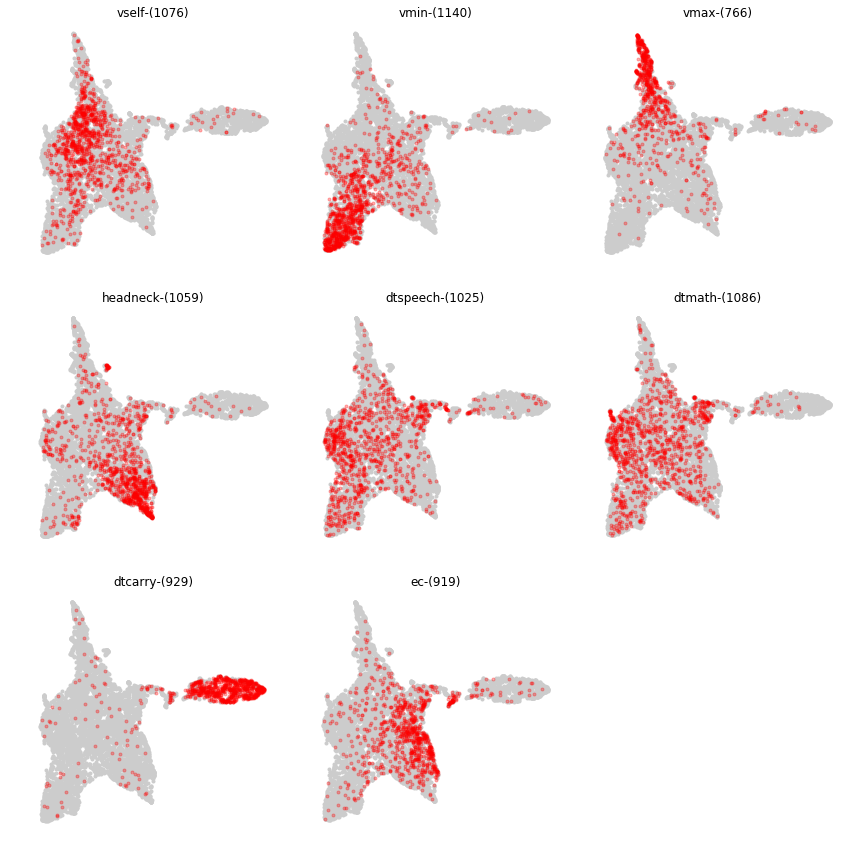

In [9]:
def plot_task_fingerprints(df, plot_title):
    all_phenos_vec = np.zeros((df.shape[0], 13))
    for i in range(df.shape[0]):
        phenos_list = np.asarray(df.iloc[i]["task"]).astype(np.int)
        all_phenos_vec[i, phenos_list] = 1

    fingerprints = np.asarray(list(df["B+C+T+P_tl_umap"]))
    fig, ax = plt.subplots(3, 3, figsize=(12,12))
    ax = ax.ravel()
    fig.suptitle(plot_title)
    for i in range(9):
        if i == 8:
            ax[i].axis("off")
        else:
            indexes_label = np.where(all_phenos_vec[:, i] == 1)
            indexes_not_label = np.where(all_phenos_vec[:, i] != 1)
            ax[i].scatter(fingerprints[indexes_not_label[0], 0], fingerprints[indexes_not_label[0], 1], c="0.8", marker=".")
            ax[i].scatter(fingerprints[indexes_label[0], 0], fingerprints[indexes_label[0], 1], c="r", marker=".", alpha=0.3)
            title = "%s-(%d)" % (idx2task(i), indexes_label[0].shape[0])
            ax[i].set_title(title.replace(" ", "\n"))
            ax[i].axis("off")
    plt.tight_layout()
    plt.savefig("tasks_task_latent_conditionals.png", dpi=300)

plot_task_fingerprints(df, "")